У цьому завданні вам потрібно завантажити ось цей датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

- data_2d.csv
https://drive.google.com/file/d/1JhLciyJegOBs3SPaJT9XPN9mmOEOWgyh/view?usp=drive_link

- mnist.csv
https://drive.google.com/file/d/1vvIgmJi0Cl_OEkdRr19qQ6BmM23MgLml/view?usp=drive_link

In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score, confusion_matrix, ConfusionMatrixDisplay

# 2D Data

## Завантаження, аналіз, очищення, візуалізація даних 2D

In [255]:
data_2d_url = "https://drive.google.com/uc?export=download&id=1JhLciyJegOBs3SPaJT9XPN9mmOEOWgyh"
df_data_2d = pd.read_csv(data_2d_url, header=None)
df_data_2d

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


In [256]:
df_data_2d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    float64
 1   1       200 non-null    float64
 2   2       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [257]:
df_data_2d.describe()

,0,1,2
count,200.000000,200.000000,200.000000
mean,0.500000,1.758886,2.211502
std,0.501255,1.239986,1.605176
min,0.000000,-1.488928,-1.344141
25%,0.000000,0.874456,0.955211
50%,0.500000,1.729753,2.282891
75%,1.000000,2.701499,3.602253
max,1.000000,4.554605,5.722027


In [258]:
# Перевірка на наявність NaN або нескінченних значень
df_data_2d.isnull().sum(), (df_data_2d == float('inf')).sum()

(0    0
 1    0
 2    0
 dtype: int64,
 0    0
 1    0
 2    0
 dtype: int64)

In [259]:
# Перевірка на дублікатні рядки
df_data_2d.duplicated().sum()

0

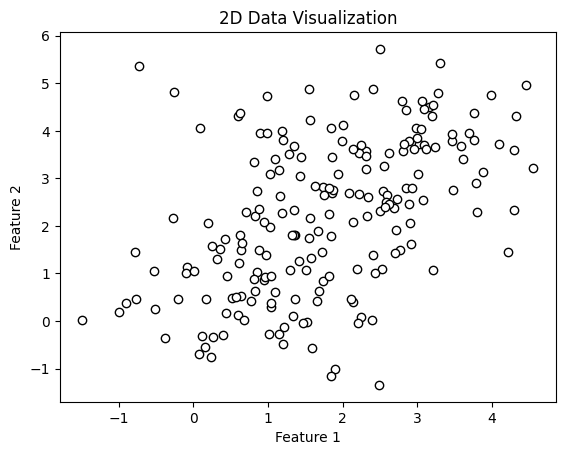

In [260]:
# Перетворюємо дані в масив NumPy
X = df_data_2d.iloc[:, 1:].values      # Вибираємо стовпці з ознаками
y_true = df_data_2d.iloc[:, 0].values  # Реальні класи (перший стовпець)

# Візуалізація
plt.scatter(
    X[:, 0], X[:, 1],    # X та Y координати (другий та третій стовпці)
    c='white',           # Колір точок
    edgecolor='black'    # Колір країв точок
)

plt.xlabel('Feature 1')  # Підпис для осі X
plt.ylabel('Feature 2')  # Підпис для осі Y
plt.title('2D Data Visualization')  # Заголовок
plt.show()  # Відображаємо графік

## Навчання моделі для 2D

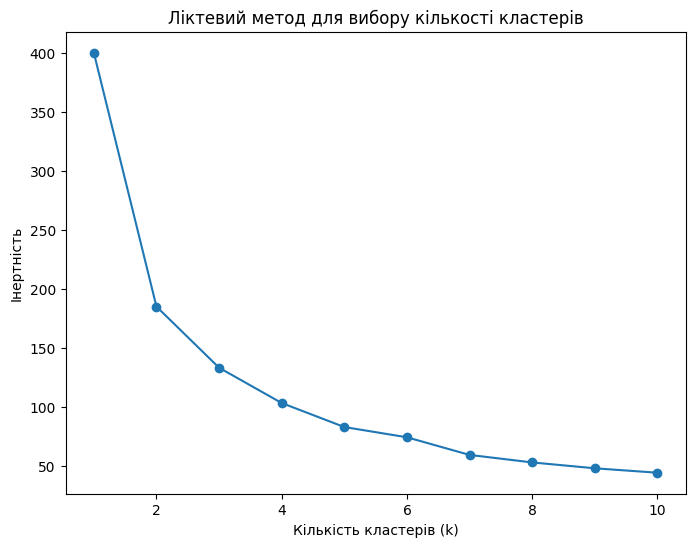

In [261]:
# Нормалізація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X - дані без першого стовпця (кластерів)

# Ліктевий метод для вибору оптимальної кількості кластерів
inertia = []  # Список для збереження інертності для різних k
k_range = range(1, 11)  # Перевіряємо кількість кластерів від 1 до 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Зберігаємо інертність для кожного k

# Візуалізація ліктевого методу
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Ліктевий метод для вибору кількості кластерів')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Інертність')
plt.show()

# Зазвичай оптимальна кількість кластерів — це точка, де інерція перестає значно зменшуватися.
# Зазвичай вибирають кількість кластерів на основі вигину графіка.

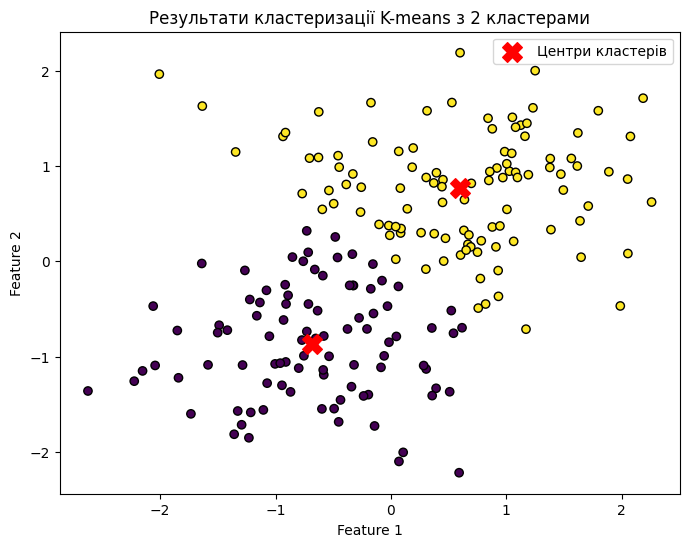

In [262]:
# Виконання K-means з 2 кластерами
optimal_k = 2

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)

# Візуалізація результатів кластеризації
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='viridis', edgecolor='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Центри кластерів')
plt.title('Результати кластеризації K-means з 2 кластерами')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Оцінка якості моделі для 2D

In [263]:
# Оцінка якості моделі за допомогою інертності
print(f"Інертність моделі: {kmeans.inertia_}")

# Оцінка якості кластеризації за допомогою силуетного коефіцієнта
silhouette_avg = silhouette_score(X_scaled, y_pred)
print(f"Силуетний коефіцієнт: {silhouette_avg}")

Інертність моделі: 184.97783610564463
Силуетний коефіцієнт: 0.45861251323506386


Adjusted Rand Index: 0.6064293780517122


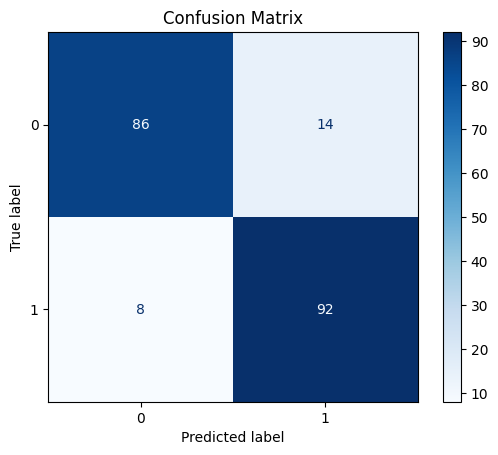

In [264]:
# Обчислюємо Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y_true, y_pred)
print(f"Adjusted Rand Index: {ari}")

# Обчислюємо Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Виводимо Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

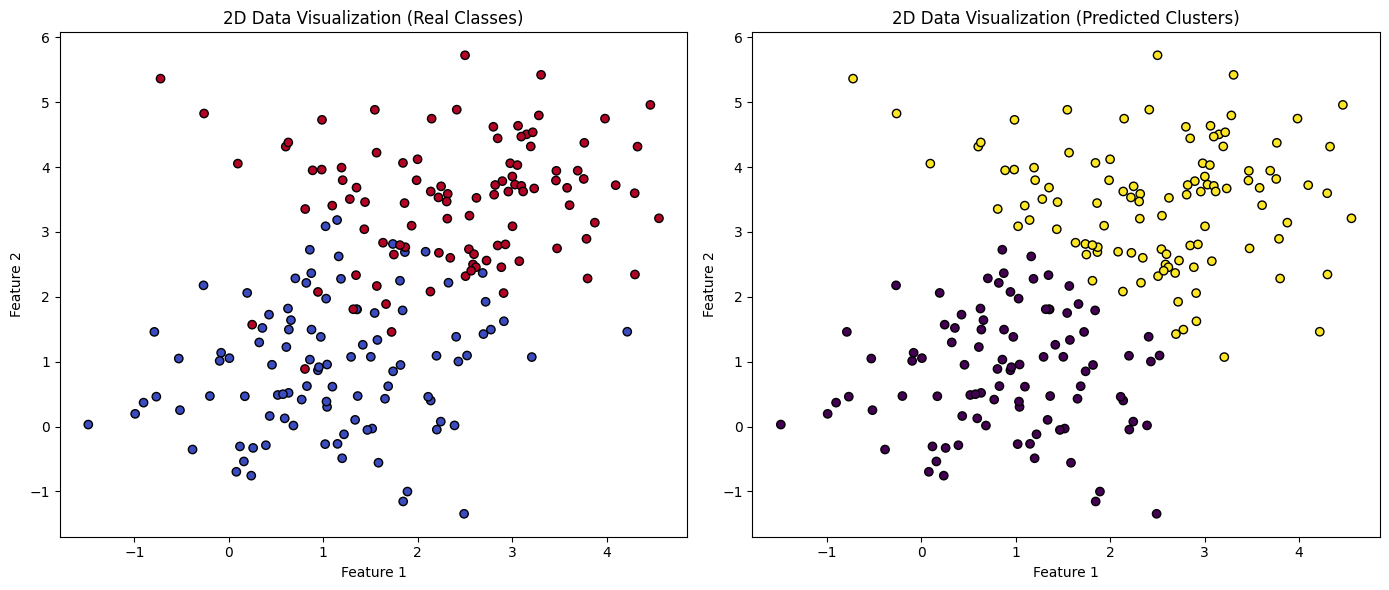

In [265]:
# Створюємо підграфіки
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Графік для реальних класів (y_true)
ax1.scatter(
    X[:, 0], X[:, 1],     # X та Y координати (другий та третій стовпці)
    c=y_true,             # Реальні класи, кольори точок
    cmap='coolwarm',      # Колірна палітра
    edgecolor='black'     # Колір країв точок
)
ax1.set_xlabel('Feature 1')  # Підпис для осі X
ax1.set_ylabel('Feature 2')  # Підпис для осі Y
ax1.set_title('2D Data Visualization (Real Classes)')  # Заголовок

# Графік для передбачених класів (y_pred)
ax2.scatter(
    X[:, 0], X[:, 1],    # X та Y координати (другий та третій стовпці)
    c=y_pred,            # Передбачені класи, кольори точок
    cmap='viridis',      # Колірна палітра
    edgecolor='black'    # Колір країв точок
)
ax2.set_xlabel('Feature 1')  # Підпис для осі X
ax2.set_ylabel('Feature 2')  # Підпис для осі Y
ax2.set_title('2D Data Visualization (Predicted Clusters)')  # Заголовок

# Показуємо графіки
plt.tight_layout()
plt.show()

# MNIST Data

## Завантаження, аналіз, очищення, візуалізація даних MNIST

In [266]:
mnist_url = "https://drive.google.com/uc?export=download&id=1vvIgmJi0Cl_OEkdRr19qQ6BmM23MgLml"
df_mnist = pd.read_csv(mnist_url, header=None)
df_mnist

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [267]:
df_mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 3.0 MB


In [268]:
df_mnist.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,500.000000,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,4.378000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.506000,0.256000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.873958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.314504,5.724334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,128.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [269]:
# Перевірка на наявність NaN або нескінченних значень
df_mnist.isnull().sum(), (df_mnist == float('inf')).sum()

(0      0
 1      0
 2      0
 3      0
 4      0
       ..
 780    0
 781    0
 782    0
 783    0
 784    0
 Length: 785, dtype: int64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 780    0
 781    0
 782    0
 783    0
 784    0
 Length: 785, dtype: int64)

In [270]:
# Перевірка на дублікатні рядки
df_mnist.duplicated().sum()

0

In [271]:
# Перетворюємо дані в масив NumPy
X = df_mnist.iloc[:, 1:].values      # Вибираємо стовпці з ознаками
y_true = df_mnist.iloc[:, 0].values  # Реальні класи (перший стовпець)

In [272]:
# Нормалізація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X - дані без першого стовпця (кластерів)

## PCA

In [273]:
# Створюємо об'єкт PCA без вказівки кількості компонент
pca_mnist = PCA()

# Застосовуємо PCA для нормалізованих даних та отримуємо головні компоненти
principalComponents_mnist = pca_mnist.fit_transform(X_scaled)

# Виводимо отримані головні компоненти
principalComponents_mnist

# За допомогою методу fit_transform() обчислюються головні компоненти для нормалізованих даних X_scaled.
# Результат зберігається в змінній principalComponents_mnist, яка містить нову матрицю даних з меншою кількістю вимірів (компонентів).

array([[-4.47796600e+00,  4.20289373e+00, -1.22305338e-01, ...,
         2.86780727e-04,  9.29782951e-04,  2.87774303e-15],
       [ 4.91463297e+00, -1.23695006e+01, -1.10621419e+01, ...,
        -4.03575179e-06,  6.42460670e-06,  2.87774303e-15],
       [-6.99458874e+00, -5.62861095e+00, -3.71517016e+00, ...,
         6.84919039e-03, -1.31135450e-02,  2.87774303e-15],
       ...,
       [-6.21068758e+00,  3.01708958e-01, -3.72511467e-01, ...,
         3.58348992e-04, -5.87470446e-03,  2.87774303e-15],
       [ 3.42819851e-01, -3.63782590e-01,  6.69674665e+00, ...,
        -2.83943710e-03,  2.61326013e-03,  2.87774303e-15],
       [-4.81982963e+00, -3.17686823e+00,  1.07912794e-01, ...,
         2.20236798e-03,  1.85791762e-04,  2.87774303e-15]])

In [274]:
# Виводимо DataFrame, який містить головні компоненти
principal_Df = pd.DataFrame(data = principalComponents_mnist)
principal_Df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,-4.477966,4.202894,-0.122305,-4.184692,-4.812454,7.075780,-0.893893,-5.920931,0.815429,-1.825266,...,-0.002493,0.000271,0.006803,0.001796,0.002059,0.001948,0.002455,0.000287,0.000930,2.877743e-15
1,4.914633,-12.369501,-11.062142,8.494834,8.599221,3.316620,-1.077424,3.844174,3.059371,8.482742,...,0.000012,0.000015,0.000021,0.000010,0.000008,0.000007,0.000017,-0.000004,0.000006,2.877743e-15
2,-6.994589,-5.628611,-3.715170,-3.026865,0.029398,-0.560123,0.593114,0.911647,-0.600512,-1.444880,...,-0.007502,-0.010564,-0.022666,-0.016042,-0.020725,-0.016632,0.004283,0.006849,-0.013114,2.877743e-15
3,8.546174,-0.384736,6.492845,1.361472,2.615352,0.006587,1.227351,-10.150973,-3.208896,2.370084,...,-0.004858,0.004837,0.005239,0.004258,0.001725,-0.003856,0.002434,0.000034,-0.002109,2.877743e-15
4,1.144524,6.615554,1.632921,-3.497625,3.925159,-3.124090,1.929398,1.925429,2.802021,-5.235245,...,0.003380,-0.012054,0.000677,-0.004435,0.001818,-0.000538,-0.003201,-0.002370,0.003898,2.877743e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8.629467,-2.397190,11.542448,3.713864,4.528336,6.111960,2.724752,-2.150928,-2.418922,6.998682,...,0.001947,-0.001612,-0.005474,-0.001471,0.000591,0.003403,0.000516,0.002792,0.002511,2.877743e-15
496,-3.267829,7.231776,0.391269,-0.097508,3.528616,-4.334218,-1.858993,2.339608,3.029167,-1.278168,...,-0.003242,-0.004581,0.001813,0.006337,0.008746,-0.003132,0.005468,0.000086,0.007880,2.877743e-15
497,-6.210688,0.301709,-0.372511,0.661814,0.299081,-0.818859,-2.522176,-0.109068,-0.077414,-0.059998,...,0.001746,-0.004061,0.000371,-0.011212,-0.003933,-0.008167,0.008964,0.000358,-0.005875,2.877743e-15
498,0.342820,-0.363783,6.696747,1.080923,1.483322,0.864615,2.067837,-2.351673,-1.888717,-0.459262,...,0.018978,-0.001120,0.001121,0.004279,-0.003577,0.000834,-0.002922,-0.002839,0.002613,2.877743e-15


In [275]:
# Отримуємо пояснену дисперсію
# pca_mnist.explained_variance_

# нормалізували, привели до 1
# print('Explained variation per principal component: {}'.format(pca_mnist.explained_variance_ratio_))

# Накопичена пояснена дисперсія
cumulative_variance = np.cumsum(pca_mnist.explained_variance_ratio_)

# Показати, скільки компонент потрібно для пояснення 90% дисперсії
top_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Кількість компонент для пояснення 90% дисперсії: {top_components}")

# 103? - дуже багато, але по умовам ДЗ потрібно взяти два

Кількість компонент для пояснення 90% дисперсії: 103


Дві найважливіші компоненти: 0 і 1
Пояснена дисперсія: [0.07302906 0.0505805 ]


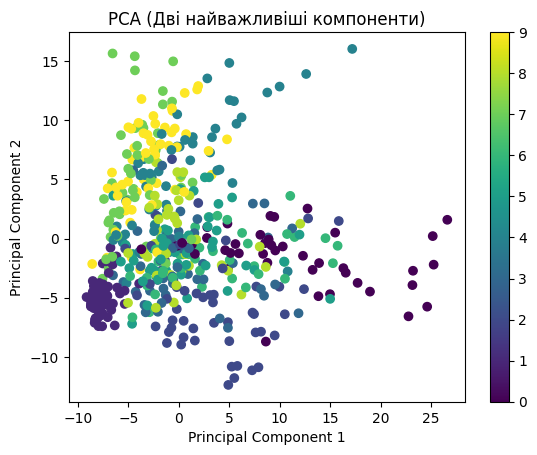

In [276]:
# Знаходимо індекси двох найбільш значущих компонент
top_2_indices = np.argsort(pca_mnist.explained_variance_ratio_)[-2:][::-1]

# Виводимо їхні номери та значення дисперсії
print(f"Дві найважливіші компоненти: {top_2_indices[0]} і {top_2_indices[1]}")
print(f"Пояснена дисперсія: {pca_mnist.explained_variance_ratio_[top_2_indices]}")

# Візуалізуємо вибрані компоненти
plt.scatter(principalComponents_mnist[:, top_2_indices[0]],
            principalComponents_mnist[:, top_2_indices[1]],
            c=y_true, cmap='viridis')

# Додаємо колірну шкалу
plt.colorbar()

# Додаємо заголовок та підписи осей
plt.title('PCA (Дві найважливіші компоненти)')
plt.xlabel(f'Principal Component {top_2_indices[0] + 1}')
plt.ylabel(f'Principal Component {top_2_indices[1] + 1}')

# Відображаємо графік
plt.show()

In [277]:
# Будемо будувати модель та використовувати PCA із n_components=2

# Створюємо об'єкт PCA, вкажемо кількість компонент = 2
pca_mnist = PCA(n_components=2)

# Застосовуємо PCA для нормалізованих даних та отримуємо головні компоненти
principalComponents_mnist = pca_mnist.fit_transform(X_scaled)

# Виводимо отримані головні компоненти
# principalComponents_mnist

# Виводимо пояснену дисперсію для цих двох компонент
print(f"Пояснена дисперсія: {pca_mnist.explained_variance_ratio_}")
print(f"Сумарна пояснена дисперсія: {sum(pca_mnist.explained_variance_ratio_):.2%}")

Пояснена дисперсія: [0.07302906 0.0505805 ]
Сумарна пояснена дисперсія: 12.36%


## Навчання моделі MNIST

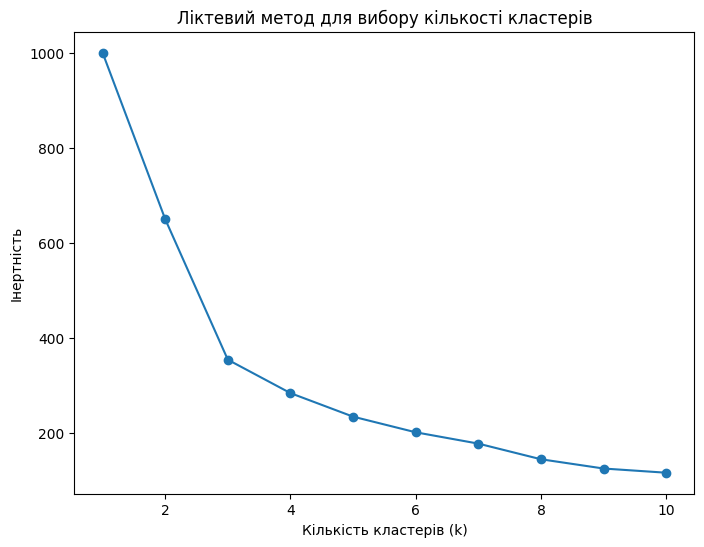

In [278]:
# Нормалізація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(principalComponents_mnist)

# Ліктевий метод для вибору оптимальної кількості кластерів
inertia = []  # Список для збереження інертності для різних k
k_range = range(1, 11)  # Перевіряємо кількість кластерів від 1 до 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Зберігаємо інертність для кожного k

# Візуалізація ліктевого методу
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Ліктевий метод для вибору кількості кластерів')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Інертність')
plt.show()

# Зазвичай оптимальна кількість кластерів — це точка, де інерція перестає значно зменшуватися.
# Зазвичай вибирають кількість кластерів на основі вигину графіка.

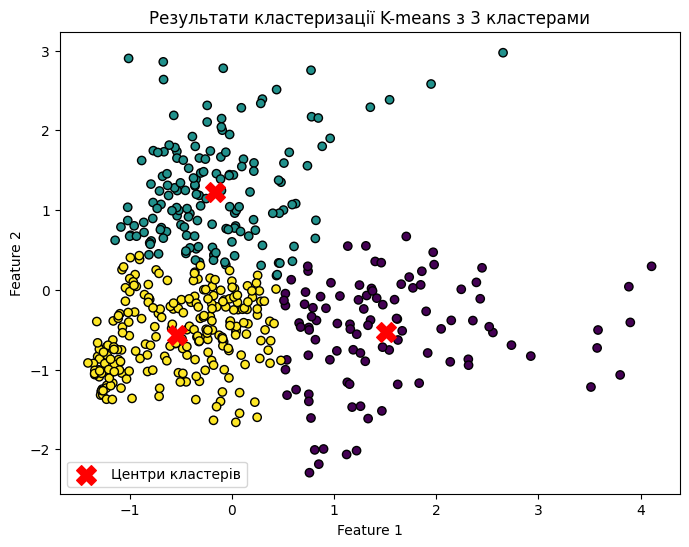

In [279]:
# Виконання K-means з 3 кластерами
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)

# Візуалізація результатів кластеризації
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='viridis', edgecolor='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Центри кластерів')
plt.title('Результати кластеризації K-means з 3 кластерами')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Оцінка якості моделі MNIST

In [280]:
# Оцінка якості моделі за допомогою інертності
print(f"Інертність моделі: {kmeans.inertia_}")

# Оцінка якості кластеризації за допомогою силуетного коефіцієнта
silhouette_avg = silhouette_score(X_scaled, y_pred)
print(f"Силуетний коефіцієнт: {silhouette_avg}")

Інертність моделі: 353.55062733743443
Силуетний коефіцієнт: 0.44806804084671475


Adjusted Rand Index: 0.129282450923292


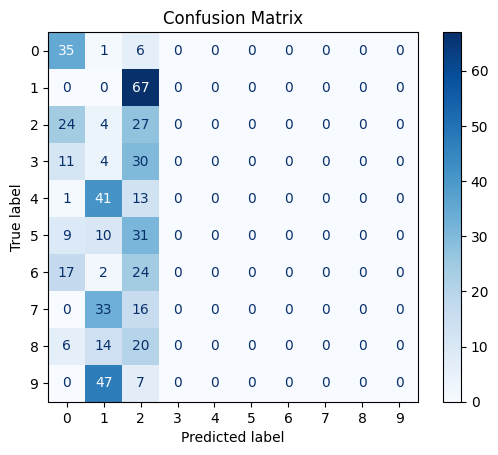

In [281]:
# Обчислюємо Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y_true, y_pred)
print(f"Adjusted Rand Index: {ari}")

# Обчислюємо Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Виводимо Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

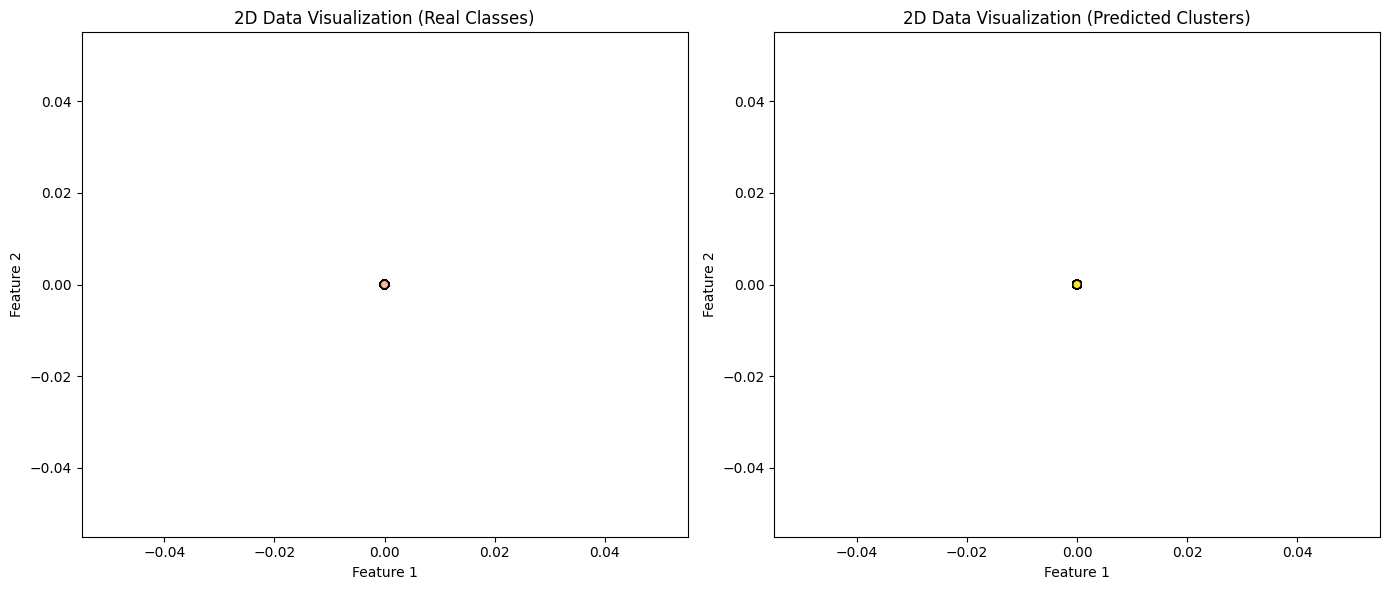

In [282]:
# Створюємо підграфіки
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Графік для реальних класів (y_true)
ax1.scatter(
    X[:, 0], X[:, 1],     # X та Y координати (другий та третій стовпці)
    c=y_true,             # Реальні класи, кольори точок
    cmap='coolwarm',      # Колірна палітра
    edgecolor='black'     # Колір країв точок
)
ax1.set_xlabel('Feature 1')  # Підпис для осі X
ax1.set_ylabel('Feature 2')  # Підпис для осі Y
ax1.set_title('2D Data Visualization (Real Classes)')  # Заголовок

# Графік для передбачених класів (y_pred)
ax2.scatter(
    X[:, 0], X[:, 1],    # X та Y координати (другий та третій стовпці)
    c=y_pred,            # Передбачені класи, кольори точок
    cmap='viridis',      # Колірна палітра
    edgecolor='black'    # Колір країв точок
)
ax2.set_xlabel('Feature 1')  # Підпис для осі X
ax2.set_ylabel('Feature 2')  # Підпис для осі Y
ax2.set_title('2D Data Visualization (Predicted Clusters)')  # Заголовок

# Показуємо графіки
plt.tight_layout()
plt.show()